# 프로젝트 1. 당뇨병 수치를 맞춰보자!

## (1) 데이터 가져오기

In [32]:
from sklearn.datasets import load_diabetes

# diabetes 변수에 데이터를 가져오기
diabetes = load_diabetes()

# diabetes 의 data를 np_x에 target 을 np_y 에 저장
np_x = diabetes.data
np_y = diabetes.target


## (2) 모델에 예측할 데이터 x 준비하기

## (3) 모델에 예측할 데이터 y 준비하기

* 데이터를 바로 불러오게 되면 numpy array로 변환해서 저장하지 않아도 numpy array 로 이미 변환되어 있습니다. 

In [42]:
## 데이터 프레임으로 받은 경우.

import pandas as pd
# (1) 데이터 가져오기
df_x = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])
df_y = pd.DataFrame(diabetes['target'])

# (2) 모델에 예측할 데이터 x 준비하기
np_x = df_x.values
print(df_x)

# (3) 모델에 예측할 데이터 y 준비하기
np_y = df_y.values.squeeze()
print(df_y)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

## (4) train 데이터와 test 데이터로 분리하기


In [44]:
# x와 y 데이터를 각각 train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np_x, 
                                                    np_y, 
                                                    test_size = 0.2, 
                                                    random_state = 77)

In [45]:
# 데이터 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기


In [46]:
# 입력 데이터 개수에 맞는 가중치 w와 b 준비하기
import numpy as np

W = np.random.rand(10)
b = np.random.rand()


In [47]:
# 모델 함수 구현하기

def model(X, W, b, N):
    predictions = 0
    for i in range(N):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 Loss 정의하기

In [48]:
# 손실함수를 MSE 함수로 정의하기

def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
      # N은 가중치의 개수
    N = len(W)
    
    predictions = model(X, W, b, N)
    L = MSE(predictions, y)
    return L


## (7) 기울기를 구하는 gradient 함수 구현하기

In [49]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b, N)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기



In [50]:
LEARNING_RATE = 0.01

losses = []

np.random.seed(seed=1) 

W = np.random.rand(10)
b = np.random.rand()

## (9) 모델 학습하기

In [51]:
for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 5000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 5000 : Loss 2820.0356
Iteration 10000 : Loss 2818.7898
Iteration 15000 : Loss 2818.1142
Iteration 20000 : Loss 2817.6384
Iteration 25000 : Loss 2817.2559
Iteration 30000 : Loss 2816.9305
Iteration 35000 : Loss 2816.6481
Iteration 40000 : Loss 2816.4011
Iteration 45000 : Loss 2816.1846
Iteration 50000 : Loss 2815.9947
Iteration 55000 : Loss 2815.8279
Iteration 60000 : Loss 2815.6816
Iteration 65000 : Loss 2815.5531
Iteration 70000 : Loss 2815.4404
Iteration 75000 : Loss 2815.3414
Iteration 80000 : Loss 2815.2545
Iteration 85000 : Loss 2815.1782
Iteration 90000 : Loss 2815.1113
Iteration 95000 : Loss 2815.0525
Iteration 100000 : Loss 2815.0009


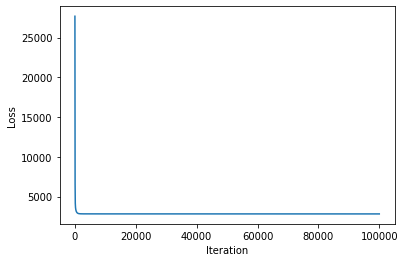

In [52]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## (10) test 데이터에 대한 성능 확인하기

In [53]:
prediction = model(X_test, W, b, len(W))
mse = loss(X_test, W, b, y_test)
mse

3150.2544639035473

## (11) 정답 데이터와 예측한 데이터 시각화하기

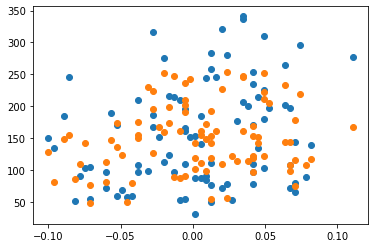

In [12]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

* 앞 부분 노드들에서 배운 코드를 단순히 활용했을 때는 손실함수 값이 3000이상이 나왔습니다. 

## 시도1. 데이터들과 타겟의 상관관계를 비교 후 학습시킬 특성 값들을 선택하여 학습을 진행해보았습니다.

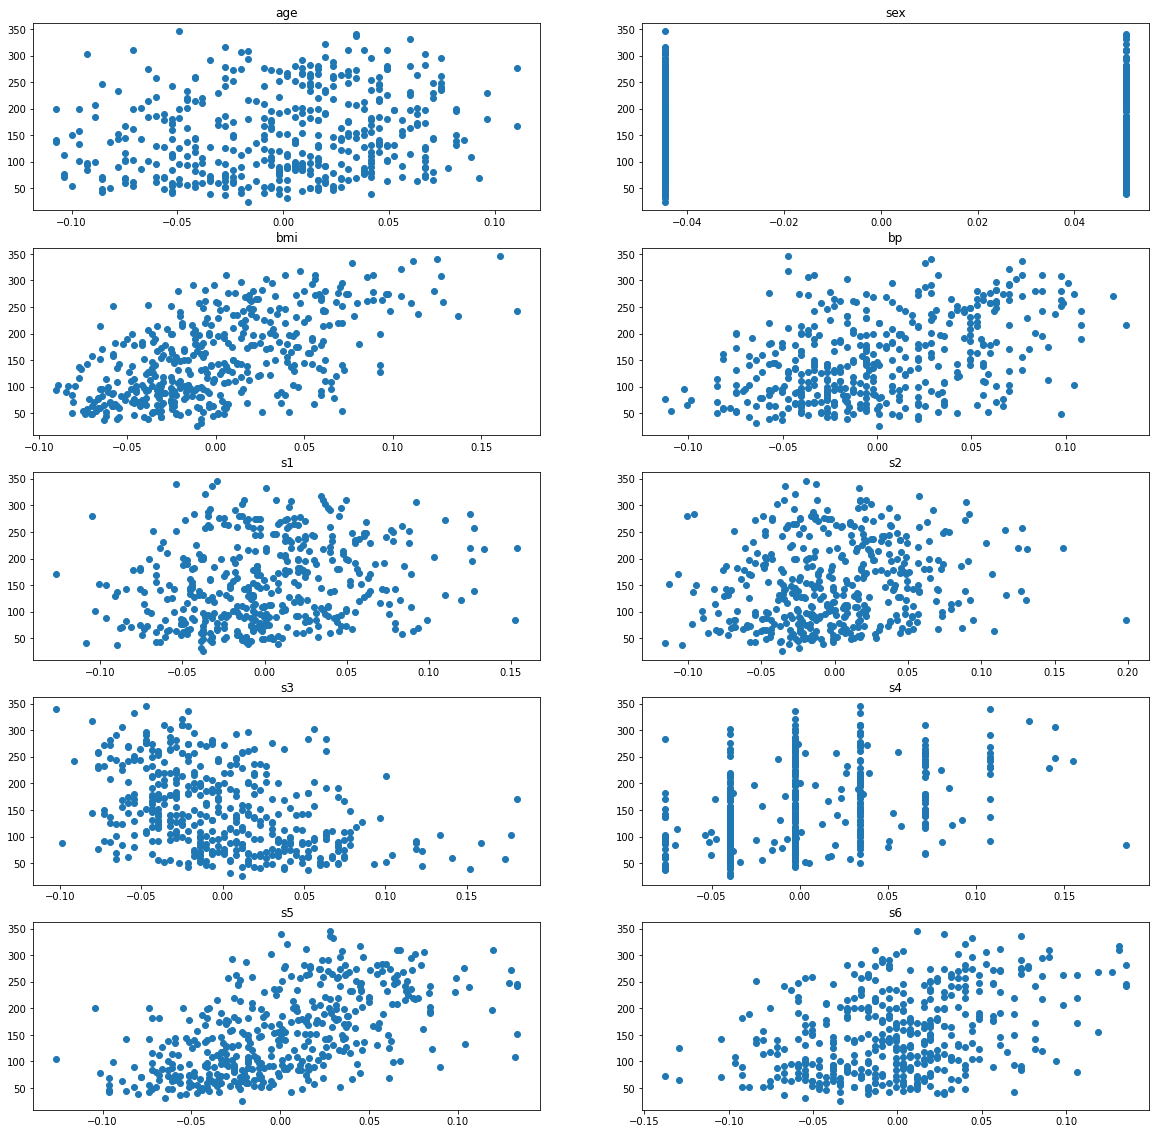

In [13]:
fig, ax = plt.subplots(5, 2,figsize=(20, 20))

ax[0, 0].scatter(np_x[:, 0], np_y) 
ax[0, 1].scatter(np_x[:, 1], np_y) 
ax[1, 0].scatter(np_x[:, 2], np_y) 
ax[1, 1].scatter(np_x[:, 3], np_y) 
ax[2, 0].scatter(np_x[:, 4], np_y) 
ax[2, 1].scatter(np_x[:, 5], np_y) 
ax[3, 0].scatter(np_x[:, 6], np_y) 
ax[3, 1].scatter(np_x[:, 7], np_y) 
ax[4, 0].scatter(np_x[:, 8], np_y) 
ax[4, 1].scatter(np_x[:, 9], np_y) 

ax[0, 0].set_title("age")
ax[0, 1].set_title("sex")
ax[1, 0].set_title("bmi")
ax[1, 1].set_title("bp")
ax[2, 0].set_title("s1")
ax[2, 1].set_title("s2")
ax[3, 0].set_title("s3")
ax[3, 1].set_title("s4")
ax[4, 0].set_title("s5")
ax[4, 1].set_title("s6")

plt.show()


In [14]:
print(np.corrcoef(np_x[:, 0], np_y))
print(np.corrcoef(np_x[:, 1], np_y))
print(np.corrcoef(np_x[:, 2], np_y))
print(np.corrcoef(np_x[:, 3], np_y))
print(np.corrcoef(np_x[:, 4], np_y))
print(np.corrcoef(np_x[:, 5], np_y))
print(np.corrcoef(np_x[:, 6], np_y))
print(np.corrcoef(np_x[:, 7], np_y))
print(np.corrcoef(np_x[:, 8], np_y))
print(np.corrcoef(np_x[:, 9], np_y))


[[1.         0.18788875]
 [0.18788875 1.        ]]
[[1.       0.043062]
 [0.043062 1.      ]]
[[1.         0.58645013]
 [0.58645013 1.        ]]
[[1.         0.44148385]
 [0.44148385 1.        ]]
[[1.         0.21202248]
 [0.21202248 1.        ]]
[[1.         0.17405359]
 [0.17405359 1.        ]]
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
[[1.         0.43045288]
 [0.43045288 1.        ]]
[[1.         0.56588343]
 [0.56588343 1.        ]]
[[1.         0.38248348]
 [0.38248348 1.        ]]


* 상관관계를 그래프로만 봤을 때는 정량적 비교가 어려워서 검색을 했고 np.corrcoef 함수를 쓰면 Pearson 유사도를 구할 수 있다고 해서 응용했습니다. 값이 1과 -1에 가까울수록 강한 선형 관계가 있다고 해석한다고 합니다. 



 

In [15]:
W = np.random.rand(9)
b = np.random.rand()

LEARNING_RATE = 0.01

losses = []

In [16]:
# Pearson 유사도가 0.1 이상인 경우 
sie_np_x = np.stack([np_x[:,0], np_x[:,5], np_x[:,2], np_x[:,3], np_x[:,4], np_x[:,6], np_x[:,7], np_x[:,8], np_x[:,9]],1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sie_np_x, 
                                                    np_y, 
                                                    test_size = 0.2, 
                                                    random_state = 77)


for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 5000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))



Iteration 5000 : Loss 2958.1657
Iteration 10000 : Loss 2957.1718
Iteration 15000 : Loss 2956.6884
Iteration 20000 : Loss 2956.3611
Iteration 25000 : Loss 2956.1017
Iteration 30000 : Loss 2955.8836
Iteration 35000 : Loss 2955.6965
Iteration 40000 : Loss 2955.5351
Iteration 45000 : Loss 2955.3957
Iteration 50000 : Loss 2955.2750
Iteration 55000 : Loss 2955.1707
Iteration 60000 : Loss 2955.0804
Iteration 65000 : Loss 2955.0024
Iteration 70000 : Loss 2954.9349
Iteration 75000 : Loss 2954.8764
Iteration 80000 : Loss 2954.8259
Iteration 85000 : Loss 2954.7822
Iteration 90000 : Loss 2954.7444
Iteration 95000 : Loss 2954.7117
Iteration 100000 : Loss 2954.6834


In [17]:
prediction = model(X_test, W, b, len(W))
mse = loss(X_test, W, b, y_test)
mse

3072.5433979348477

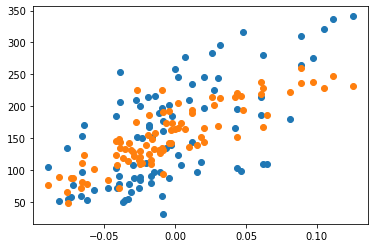

In [72]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [18]:
W = np.random.rand(4)
b = np.random.rand()

LEARNING_RATE = 0.001

losses = []

In [19]:
# Pearson 유사도가 0.4 이상인 경우 
sie_np_x = np.stack([np_x[:,2], np_x[:,3], np_x[:,7], np_x[:,8]],1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sie_np_x, 
                                                    np_y, 
                                                    test_size = 0.2, 
                                                    random_state = 77)


for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 5000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 5000 : Loss 3090.1046
Iteration 10000 : Loss 3066.6383
Iteration 15000 : Loss 3061.5977
Iteration 20000 : Loss 3060.3373
Iteration 25000 : Loss 3060.0080
Iteration 30000 : Loss 3059.9209
Iteration 35000 : Loss 3059.8977
Iteration 40000 : Loss 3059.8915
Iteration 45000 : Loss 3059.8899
Iteration 50000 : Loss 3059.8894
Iteration 55000 : Loss 3059.8893
Iteration 60000 : Loss 3059.8893
Iteration 65000 : Loss 3059.8893
Iteration 70000 : Loss 3059.8893
Iteration 75000 : Loss 3059.8893
Iteration 80000 : Loss 3059.8893
Iteration 85000 : Loss 3059.8893
Iteration 90000 : Loss 3059.8893
Iteration 95000 : Loss 3059.8893
Iteration 100000 : Loss 3059.8893


In [20]:
prediction = model(X_test, W, b, len(W))
mse = loss(X_test, W, b, y_test)
mse

3175.960920106291

* 특성과 결과의 상관관계를 보고 특성을 선택해서 학습을 진행했는데 mse 값은 유의미하게 나아지지 않았습니다.

## 시도 2. 특성값 자체를 정규화 시켜서 진행했습니다. 

In [21]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(np_x) 
np_x = transformer.transform(np_x)

print(np_x)

[[0.66666667 1.         0.58264463 ... 0.28208745 0.56221737 0.43939394]
 [0.48333333 0.         0.14876033 ... 0.14104372 0.22244301 0.16666667]
 [0.88333333 1.         0.51652893 ... 0.28208745 0.49658437 0.40909091]
 ...
 [0.68333333 1.         0.28512397 ... 0.24964739 0.30504048 0.56060606]
 [0.28333333 0.         0.49586777 ... 0.39351199 0.65702021 0.40909091]
 [0.28333333 0.         0.0661157  ... 0.14104372 0.46930778 0.51515152]]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(np_x, 
                                                    np_y, 
                                                    test_size = 0.2, 
                                                    random_state = 77)

In [27]:
W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.0001

losses = []

In [29]:
for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2837.2665
Iteration 2000 : Loss 2836.8314
Iteration 3000 : Loss 2836.4073
Iteration 4000 : Loss 2835.9940
Iteration 5000 : Loss 2835.5909
Iteration 6000 : Loss 2835.1976
Iteration 7000 : Loss 2834.8139
Iteration 8000 : Loss 2834.4393
Iteration 9000 : Loss 2834.0736
Iteration 10000 : Loss 2833.7164
Iteration 11000 : Loss 2833.3675
Iteration 12000 : Loss 2833.0265
Iteration 13000 : Loss 2832.6933
Iteration 14000 : Loss 2832.3675
Iteration 15000 : Loss 2832.0489
Iteration 16000 : Loss 2831.7373
Iteration 17000 : Loss 2831.4324
Iteration 18000 : Loss 2831.1342
Iteration 19000 : Loss 2830.8423
Iteration 20000 : Loss 2830.5565
Iteration 21000 : Loss 2830.2768
Iteration 22000 : Loss 2830.0028
Iteration 23000 : Loss 2829.7345
Iteration 24000 : Loss 2829.4717
Iteration 25000 : Loss 2829.2143
Iteration 26000 : Loss 2828.9620
Iteration 27000 : Loss 2828.7147
Iteration 28000 : Loss 2828.4724
Iteration 29000 : Loss 2828.2348
Iteration 30000 : Loss 2828.0019
Iteration 31000 : L

In [30]:
prediction = model(X_test, W, b, len(W))
mse = loss(X_test, W, b, y_test)
mse

3112.9212438396316

* 여전히 유의미한 차이없이 3000 이상이 나왔습니다.

## 시도 3. train과 test split 의 랜덤 스테이트를 바꿔보았습니다. 

In [54]:
# x와 y 데이터를 각각 train 데이터와 test 데이터로 분리하기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np_x, 
                                                    np_y, 
                                                    test_size = 0.2, 
                                                    random_state = 7)

In [56]:
W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.01

losses = []

In [57]:
for i in range(1, 100001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 2946.8671
Iteration 2000 : Loss 2885.7905
Iteration 3000 : Loss 2880.4784
Iteration 4000 : Loss 2879.1282
Iteration 5000 : Loss 2878.2178
Iteration 6000 : Loss 2877.3945
Iteration 7000 : Loss 2876.6090
Iteration 8000 : Loss 2875.8516
Iteration 9000 : Loss 2875.1192
Iteration 10000 : Loss 2874.4097
Iteration 11000 : Loss 2873.7219
Iteration 12000 : Loss 2873.0546
Iteration 13000 : Loss 2872.4067
Iteration 14000 : Loss 2871.7774
Iteration 15000 : Loss 2871.1659
Iteration 16000 : Loss 2870.5715
Iteration 17000 : Loss 2869.9936
Iteration 18000 : Loss 2869.4315
Iteration 19000 : Loss 2868.8849
Iteration 20000 : Loss 2868.3531
Iteration 21000 : Loss 2867.8357
Iteration 22000 : Loss 2867.3324
Iteration 23000 : Loss 2866.8425
Iteration 24000 : Loss 2866.3659
Iteration 25000 : Loss 2865.9021
Iteration 26000 : Loss 2865.4507
Iteration 27000 : Loss 2865.0113
Iteration 28000 : Loss 2864.5838
Iteration 29000 : Loss 2864.1677
Iteration 30000 : Loss 2863.7627
Iteration 31000 : L

In [58]:
prediction = model(X_test, W, b, len(W))
mse = loss(X_test, W, b, y_test)
mse

2953.76707221399

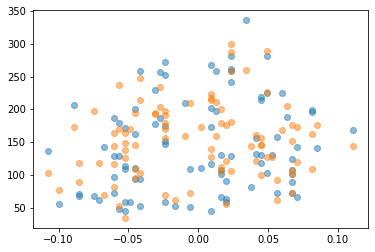

In [62]:
plt.scatter(X_test[:, 0], y_test, alpha = 0.5)
plt.scatter(X_test[:, 0], prediction, alpha = 0.5)
plt.show()

# **결론**

- 주어진 모델을 활용하여 Learning late 와 epoch 가 학습에 끼치는 영향에 대해서 학습할 수 있었습니다. 학습을 위해서는 적절한 하이퍼 파라미터를 선택하는 것이 중요한 것 같습니다.

- 또한, 데이터를 train 과 test 로 분류하는 것 역시 학습에 영향을 끼친다는 것을 확인할 수 있었습니다. 


# 프로젝트 2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명? 

# (1) 데이터 가져오기

In [63]:
import os
from os.path import join

import pandas as pd
import numpy as np

data_dir = '/content/drive/MyDrive/0.AIFFEL/LMS node/Exp 02'

train_data_path = join(data_dir, 'train.csv')
df = pd.read_csv(train_data_path)

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [64]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [65]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day
df['hour']=df['datetime'].dt.hour
df['min']=df['datetime'].dt.minute
df['sec']=df['datetime'].dt.second


In [66]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


In [67]:
df['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

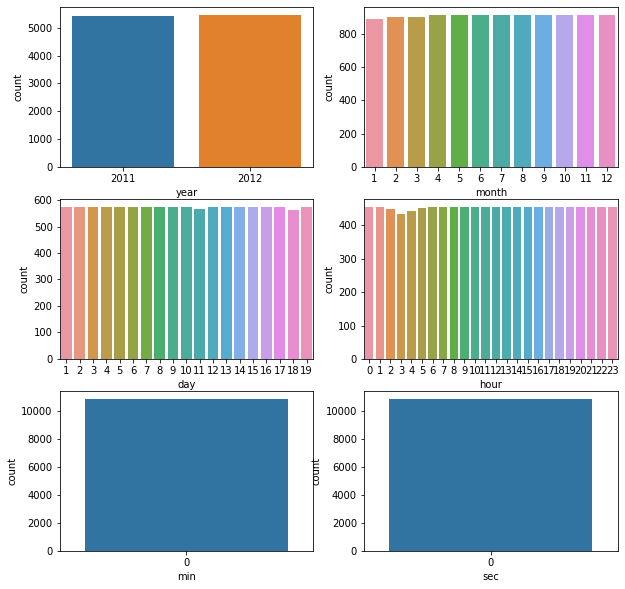

In [68]:
import seaborn as sns

fig, ax = plt.subplots(3, 2, figsize=(10,10))

sns.countplot(x="year", data = df, ax=ax[0,0])
sns.countplot(x="month", data = df, ax=ax[0,1])
sns.countplot(x="day", data = df, ax=ax[1,0])
sns.countplot(x="hour", data = df, ax=ax[1,1])
sns.countplot(x="min", data = df, ax=ax[2,0])
sns.countplot(x="sec", data = df, ax=ax[2,1])

plt.show()

# (4) X, y 컬럼 선택 및 train/test 데이터 분리


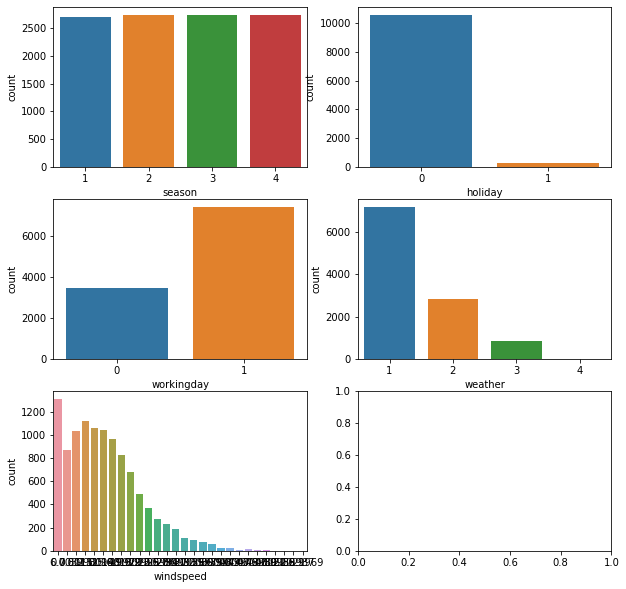

In [69]:
# 다른 데이터 확인

fig, ax = plt.subplots(3, 2, figsize=(10,10))

sns.countplot(x="season", data = df, ax=ax[0,0])
sns.countplot(x="holiday", data = df, ax=ax[0,1])
sns.countplot(x="workingday", data = df, ax=ax[1,0])
sns.countplot(x="weather", data = df, ax=ax[1,1])
sns.countplot(x="windspeed", data = df, ax=ax[2,0])

plt.show()

In [70]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [72]:
y = df['count'].values
df_1 = df.drop(['datetime', 'min', 'sec','count','casual','registered'], axis=1)
df_1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [73]:
y

array([ 16,  40,  32, ..., 168, 129,  88])

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_1, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 77)

# (5) LinearRegression 모델 학습


In [75]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)



LinearRegression()

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [76]:
y_pred_LR = LR_model.predict(X_test)

In [77]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

loss = MSE(y_pred_LR, y_test)
print(loss)

19957.165412754155


In [78]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

print(RMSE(y_pred_LR, y_test))

141.26983192725245


# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

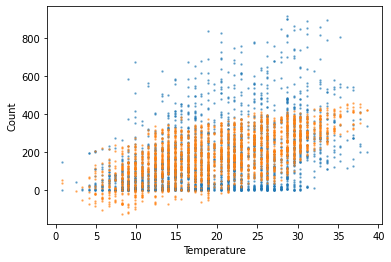

In [90]:
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기 

plt.scatter(X_test.iloc[:,4], y_test, s=2, alpha = 0.5)
plt.scatter(X_test.iloc[:,4], y_pred_LR, s=2, alpha = 0.5)
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

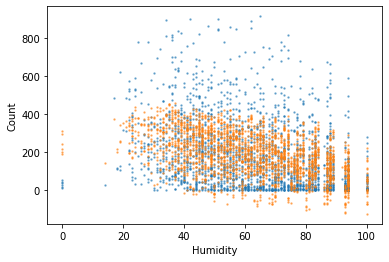

In [91]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기 

plt.scatter(X_test.iloc[:,6], y_test, s=2, alpha = 0.5)
plt.scatter(X_test.iloc[:,6], y_pred_LR, s=2, alpha = 0.5)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()

# **결론**

- 본 프로젝트는 학습하기 전 특성들을 살펴보고 어떤 특성을 필요로 하는지 파악하고 전처리를 하는 과정을 잘 진행해야 하는 프로젝트였다. 

- 온도와 습도, 날짜, 시간, 계정 등의 다양한 특성들을 바탕으로 자전거 대여량을 예측할 때 LinearRegression 모델을 활용하면 목표 오차값 이하를 얻을 수 있었다. 


# **회고**

- 첫번째 노드에 비해서 난이도가 갑자기 어려워져서 생각보다 시간이 많이 소요됨.

- 특히 첫번째 문제에서는 모델을 변경하지 않고 하이퍼파라미터와 입력 데이터만을 통해서 오차를 줄이는 것이 생소해서 어려웠음.

